In [2]:


#prediction data 

import numpy as np
import matplotlib.pyplot as plt
from pandas_ods_reader import read_ods
import csv
import re
import os
import pandas as pd

for num in range(1,4,1):
    
    f1 = open('prediction_data_in'+str(num)+'.csv','w',encoding='utf-8')
    csv_writer = csv.writer(f1) 
    csv_writer.writerow("M")

    folder_num = range(6,7,1)
    for i in folder_num:
        folder = str(i)
        path1 = folder + "/opencv_data_in"+str(num)
        data1 = pd.read_csv(path1)
        data1 = data1.values
        print(data1.shape[0])
        for j in range(0,data1.shape[0]):
            csv_writer.writerow(data1[j,:])        
    f1.close()



128400
128400
128400


In [3]:
path1 = "prediction_data_in1.csv"
path2 = "prediction_data_in2.csv"
path3 = "prediction_data_in3.csv"

data1 = pd.read_csv(path1)
data1 = data1.values
data2 = pd.read_csv(path2)
data2 = data2.values
data3 = pd.read_csv(path3)
data3 = data3.values

print(data1.shape)
print(data2.shape)
print(data3.shape)

(128400, 1)
(128400, 1)
(128400, 1)


In [5]:

data_in1 = np.zeros((data1.shape[0],320))
data_in2 = np.zeros((data2.shape[0],320))
data_in3 = np.zeros((data3.shape[0],320))
for u in range(0,data1.shape[0]):
    if data1[u,0] != "MMM":
        a = data1[u,0]
        b = a.split("\t")
        for v in range(0,320):
            data_in1[u,v] = b[v]
            
        a = data2[u,0]
        b = a.split("\t")
        for v in range(0,320):
            data_in2[u,v] = b[v]
            
        a = data3[u,0]
        b = a.split("\t")
        for v in range(0,320):
            data_in3[u,v] = b[v]
            
    else:
        data_in1[u,0] = -333
        data_in2[u,0] = -333
        data_in3[u,0] = -333

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


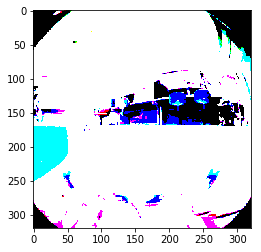

In [6]:

image = np.zeros((320,320,3))
for i in range(0,320):
    image[i,:,1] = data_in1[i,:]
    image[i,:,2] = data_in2[i,:]
    image[i,:,0] = data_in3[i,:]
plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


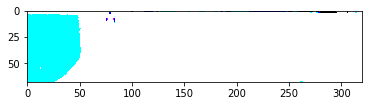

In [7]:
limit_top = 167
limit_below = 235
image = np.zeros((limit_below-limit_top,320,3))
for i in range(limit_top,limit_below,1):
    image[i-limit_top,:,1] = data_in1[i,:]
    image[i-limit_top,:,2] = data_in2[i,:]
    image[i-limit_top,:,0] = data_in3[i,:]
plt.imshow(image)

In [9]:
picture_num = 400

cut_data_in1 = np.zeros((limit_below-limit_top,320,picture_num))
cut_data_in2 = np.zeros((limit_below-limit_top,320,picture_num))
cut_data_in3 = np.zeros((limit_below-limit_top,320,picture_num))
flag = -1
flag2 = -1
pic_num = 0
for k in range(0,data_in1.shape[0]):
    if data_in1[k,0] == -333:
        flag = -1
        flag2 = k
        pic_num = pic_num + 1
    else:
        flag = flag + 1
        flag2 = flag2 + 1
        
    if flag >= limit_top and flag < limit_below:
        cut_data_in1[flag-limit_top,:,pic_num] = data_in1[flag2,:]
        cut_data_in2[flag-limit_top,:,pic_num] = data_in2[flag2,:]
        cut_data_in3[flag-limit_top,:,pic_num] = data_in3[flag2,:]
        
print(cut_data_in1.shape)

(68, 320, 400)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


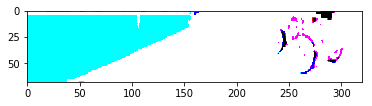

In [10]:
image2 = np.zeros((limit_below-limit_top,320,3))
loc = 79
image2[:,:,1] = cut_data_in1[:,:,loc]
image2[:,:,2] = cut_data_in2[:,:,loc]
image2[:,:,0] = cut_data_in3[:,:,loc]
plt.imshow(image2)

In [11]:
"""
f2 = open('prediction_data_in.csv','w',encoding='utf-8')
csv_writer2 = csv.writer(f2)
input_data = np.zeros((cut_data_in1.shape[2],cut_data_in1.shape[1]))
for h in range(0,cut_data_in1.shape[2]):
    for k in range(0,cut_data_in1.shape[1]):
        input_data[h,k] = sum(cut_data_in1[:,k,h]) + sum(cut_data_in2[:,k,h]) + sum(cut_data_in3[:,k,h])
    csv_writer2.writerow(input_data[h,:])
f2.close()
"""

f2 = open('prediction_data_in.csv','w',encoding='utf-8')
csv_writer2 = csv.writer(f2)
input_data = np.zeros((cut_data_in1.shape[2],cut_data_in1.shape[1]*2))
input_data2 = np.zeros((cut_data_in1.shape[2],cut_data_in1.shape[1]*3))
Blue = np.zeros((1,cut_data_in1.shape[1]))
Green = np.zeros((1,cut_data_in1.shape[1]))
Red = np.zeros((1,cut_data_in1.shape[1]))
for h in range(0,cut_data_in1.shape[2]):
    for k in range(0,cut_data_in1.shape[1]):
        Blue[0,k] = sum(cut_data_in1[:,k,h])
        Green[0,k] = sum(cut_data_in2[:,k,h])
        Red[0,k] = sum(cut_data_in3[:,k,h])
    input_data[h,:] = np.append(Blue[0,:],Green[0,:])
    input_data2[h,:] = np.append(input_data[h,:],Red[0,:])
    csv_writer2.writerow(input_data2[h,:])
f2.close()
print(input_data2.shape)

(400, 960)


In [21]:
print(input_data)

[[ 4304.  4460.  5006. ... 14235. 14189. 14088.]
 [ 5166.  5600.  6123. ... 14312. 14269. 14197.]
 [ 4550.  4936.  4906. ... 13917. 13813. 13710.]
 ...
 [ 5157.  5116.  5035. ...  6814.  4184.  4175.]
 [ 5239.  5139.  5217. ...  4795.  5291.  5221.]
 [ 5179.  5169.  5011. ...  9003.  6754.  4065.]]


In [15]:
import os
os.remove("prediction_data_in1.csv")
os.remove("prediction_data_in2.csv")
os.remove("prediction_data_in2.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'prediction_data_in2.csv'